# Building Baseline Classification Model

In this notebook, I will build a baseline classification model. The ultimate goal of the project is to build a model that takes a new-born infant's and its parents' data and predict whether the baby dies or not. First, it is necessarry to encode the categorical features in the cleaned data, before applying machine learning algorithms such as logistic regression, support vector machine, etc. <br> <br> Four features (manner of death, place of death, international cause of death code, cause of death recode), which are linked only with the infant death data, acting as proxy for the class labels, are not included in the predictors. The experiment that shows the effect of proxy features on the apparent performance of classifiers is detailed in the notebook **"Effect_of_proxy_features_experiment".**

In [1]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
%matplotlib inline

In [2]:
Data_2008 = pd.read_pickle('CleanData_ML_final')

In [3]:
Data_2008.rename(columns=lambda x: x.strip(),inplace = True)

In [4]:
attribute_list = list(Data_2008.columns.str.strip()) #strip in case some of the column names have spaces around them.
print(attribute_list)

['AB_ANTI', 'AB_AVEN1', 'AB_AVEN6', 'AB_BINJ', 'AB_NICU', 'AB_SEIZ', 'AB_SURF', 'APGAR5', 'ATTEND', 'BFACIL', 'BRTHWGT', 'CA_ANEN', 'CA_CCHD', 'CA_CDH', 'CA_CLEFT', 'CA_CLPAL', 'CA_DISOR', 'CA_DOWN', 'CA_GAST', 'CA_HYPO', 'CA_LIMB', 'CA_MNSB', 'CA_OMPH', 'CIG_1', 'CIG_2', 'CIG_3', 'CIG_REC', 'COMBGEST', 'DMETH_REC', 'DPLURAL', 'ESTGEST', 'FAGECOMB', 'FBRACE', 'FLGND', 'FRACEHISP', 'LBO', 'LD_ANES', 'LD_ANTI', 'LD_AUGM', 'LD_CHOR', 'LD_FINT', 'LD_INDL', 'LD_MECS', 'LD_NVPR', 'LD_STER', 'MAGER', 'MAR', 'MBRACE', 'MEDUC', 'ME_ATTF', 'ME_ATTV', 'ME_PRES', 'ME_ROUT', 'ME_TRIAL', 'MRACEHISP', 'MRACEREC', 'ON_PRECIP', 'ON_PROL', 'ON_RUPTR', 'OP_CERV', 'OP_ECVF', 'OP_ECVS', 'OP_TOCOL', 'PRECARE', 'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'RF_CESARN', 'RF_DIAB', 'RF_ECLAM', 'RF_GEST', 'RF_GHYP', 'RF_PHYP', 'RF_PPOUTC', 'RF_PPTERM', 'SEX', 'TBO', 'UBFACIL', 'UCA_ANEN', 'UCA_CELFTLP', 'UCA_DOWNS', 'UCA_OMPHA', 'UCA_SPINA', 'UFHISP', 'ULD_BREECH', 'ULD_MECO', 'ULD_PRECIP', 'UME_FORCP', 'UME_VAC', 'UMH

In [5]:
len(attribute_list)

98

### Categorical, numerical, and binary features

Make a list of categorical, numerical, and binary features. The aim is to apply encode the categorical features. After data cleaning, there are 102 features and 1,569,762 records in total. Out of these, there are 21 categorical, 17 numerical, and 60 binary features.

In [6]:
categorical_attribute = ['ATTEND','BFACIL','DMETH_REC','FBRACE','FRACEHISP','MBRACE',
                         'ME_PRES','ME_ROUT','ME_TRIAL','MRACEHISP','MRACEREC','RDMETH_REC','RESTATUS',
                        'UBFACIL','UCA_ANEN','UCA_CELFTLP','UCA_DOWNS','UCA_OMPHA','UCA_SPINA',
                        'UFHISP','UMHISP']

In [7]:
numerical_attribute = ['APGAR5','BRTHWGT','CIG_1','CIG_2','CIG_3','COMBGEST','DPLURAL','ESTGEST','FAGECOMB','LBO','MAGER',
                      'MEDUC','PRECARE','RF_CESARN','TBO','UPREVIS','WTGAIN']

In [8]:
binary_attribute = ['AB_ANTI','AB_AVEN1','AB_AVEN6','AB_BINJ','AB_NICU','AB_SEIZ','AB_SURF','CA_ANEN','CA_CCHD',
                   'CA_CDH','CA_CLEFT','CA_CLPAL','CA_DISOR','CA_DOWN','CA_GAST','CA_HYPO','CA_LIMB','CA_MNSB',
                   'CA_OMPH','CIG_REC','FLGND','LD_ANES','LD_ANTI','LD_AUGM','LD_CHOR','LD_FINT','LD_INDL','LD_MECS',
                   'LD_NVPR','LD_STER','MAR','ME_ATTF','ME_ATTV','ON_PRECIP','ON_PROL','ON_RUPTR','OP_CERV',
                   'OP_ECVF','OP_ECVS','OP_TOCOL','RF_CESAR','RF_DIAB','RF_ECLAM','RF_GEST','RF_GHYP','RF_PHYP',
                   'RF_PPOUTC','RF_PPTERM','SEX','ULD_BREECH','ULD_MECO','ULD_PRECIP','UME_FORCP','UME_VAC',
                    'UOP_INDUC','UOP_TOCOL','URF_CHYPER','URF_DIAB','URF_ECLAM','URF_PHYPER']

Convert the numerical and binary features to float and int types respectively

In [9]:
for i in numerical_attribute:
    Data_2008['%s' % i] = Data_2008['%s' % i].astype(float)

In [10]:
for j in binary_attribute:
    Data_2008['%s' % j] = Data_2008['%s' % j].astype(int)

Encode the categorical features and assign a name to each new derived column 

In [11]:
df = pd.get_dummies(Data_2008, prefix=categorical_attribute, columns=categorical_attribute)
df.shape

(1569762, 192)

Lets look at the number of positive (death) and negative (natality) data size

In [12]:
Data_2008['FLGND'].value_counts()

0    1562931
1       6831
Name: FLGND, dtype: int64

In [13]:
df_features = list(df.columns)
df_features.remove('FLGND')

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

In [15]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [16]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.9):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size, random_state = 42)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    y_score = clf.decision_function(Xtest)
    ytrain_score = clf.decision_function(Xtrain)
    test_average_precision = average_precision_score(ytest, y_score)
    train_average_precision = average_precision_score(ytrain, ytrain_score)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    print('Average test precision score: {0:0.2f}'.format(test_average_precision))
    print('Average train precision score: {0:0.2f}'.format(train_average_precision))
    return clf, Xtrain, ytrain, Xtest, ytest,y_score,ytrain_score

In [17]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l,yscore_1,ytrain_score_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1]}, 
                                                           df, df_features, 'FLGND',1)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


BEST PARAMS {'C': 1}
Accuracy on training data: 1.00
Accuracy on test data:     1.00
Average test precision score: 0.42
Average train precision score: 0.40


Lets look at the percentage of positive and negative observations in both training and test datasets.

In [18]:
SS_train = Xtrain_l.shape[0] 
SS_test = Xtest_l.shape[0]
PP_train = round(np.sum(ytrain_l)/SS_train,3)
NP_train = round(np.sum(ytrain_l == 0)/SS_train,3)
PP_test = round(np.sum(ytest_l)/SS_test,3)
NP_test = round(np.sum(ytest_l == 0)/SS_test,3)

In [19]:
print(np.sum(ytest_l),np.sum(ytest_l == 0))

696 156281


**Confusion matrix of test data**

In [20]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(ytest_l,clf_l.predict(Xtest_l))
print(cm_test)
cm_test = pd.DataFrame(cm_test)

[[156208     73]
 [   470    226]]


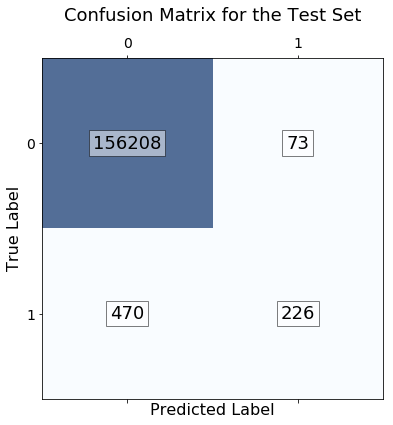

In [60]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
confmat_test = confusion_matrix(ytest_l, clf_l.predict(Xtest_l))
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat_test, cmap=plt.cm.Blues, alpha=0.7)
#ax.grid(color='r', linestyle='-', linewidth=2)
for i in range(confmat_test.shape[0]):
    for j in range(confmat_test.shape[1]):
        ax.text(x=j, y=i, s=confmat_test[i, j], va='center', ha='center',fontsize=18,bbox=dict(facecolor='white', alpha=0.5))
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.xlabel('Predicted Label',size=16)
plt.ylabel('True Label',size=16)
plt.title('Confusion Matrix for the Test Set',size=18)
plt.tight_layout()
plt.savefig('confusion_matrix_test.eps',format = 'eps',dpi = 1300)
plt.show()


In [22]:
TN_test, FP_test, FN_test, TP_test = confusion_matrix(ytest_l,clf_l.predict(Xtest_l)).ravel()

In [23]:
print(TN_test,TP_test,FP_test,FN_test)

156208 226 73 470


In [24]:
TN_train,FP_train,FN_train,TP_train = confusion_matrix(ytrain_l,clf_l.predict(Xtrain_l)).ravel()

In [25]:
print(TN_train,TP_train,FP_train,FN_train)

1405956 1847 694 4288


In [26]:
#TN_train = cm_train[0][0];TP_train = cm_train[1][1];FP_train = cm_train[0][1]; FN_train = cm_train[1][0]

In [27]:
pd.set_option('precision', 3)

TPR_test = round(TP_test/(TP_test+FN_test),3) #true positive rate (Recall)

TNR_test = round(TN_test/(TN_test+FP_test),3) #true negative rate (Specifity)

PPV_test = round(TP_test/(TP_test+FP_test),3) #positive predictive value (Precision)

NPV_test = round(TN_test/(TN_test+FN_test),3) # Negative predictive value

FPR_test = round(FP_test/(FP_test+TN_test),3) # Fall out or false positive rate

FNR_test = round(FN_test/(TP_test+FN_test),3) # False negative rate

FDR_test = round(FP_test/(TP_test+FP_test),3) # False discovery rate

ACC_test = round((TP_test+TN_test)/(TP_test+FP_test+FN_test+TN_test),3) # Overall accuracy

In [28]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(ytest_l, clf_l.predict(Xtest_l)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.32      1.00      0.87      0.77    156281
          1       0.76      0.32      1.00      0.45      0.87      0.74       696

avg / total       1.00      1.00      0.33      1.00      0.87      0.77    156977



***PRECISION-RECALL CURVE***

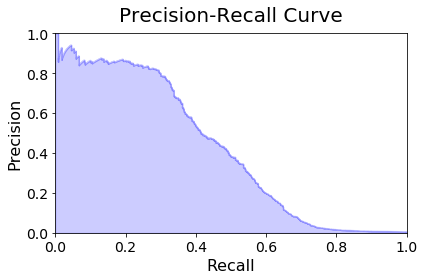

In [71]:
from sklearn.metrics import precision_recall_curve
precision_test, recall_test, _ = precision_recall_curve(ytest_l, yscore_1)
rcParams['axes.titlepad'] = 12 
plt.step(recall_test, precision_test, color='b', alpha=0.2,where='post')
plt.fill_between(recall_test, precision_test, step='post', alpha=0.2,color='b')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.xlabel('Recall',size=16)
plt.ylabel('Precision',size=16)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve',size=20)
plt.tight_layout()
plt.savefig('precision_recall_test.png',format = 'png')

***Receiver Operating Characteristic***

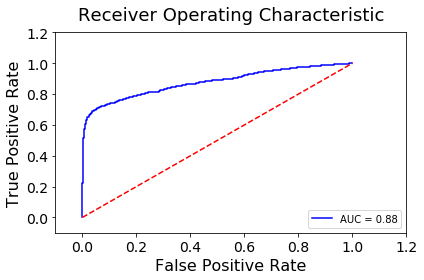

In [72]:
from sklearn.metrics import roc_curve, auc
fpr1_test, tpr1_test, _ = roc_curve(ytest_l, yscore_1)
roc_auc_test = auc(fpr1_test, tpr1_test)
#print(fpr)
plt.title('Receiver Operating Characteristic',size=18)
plt.plot(fpr1_test, tpr1_test, 'b',label='AUC = %0.2f'% roc_auc_test)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
rcParams['axes.titlepad'] = 20 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate',size=16)
plt.xlabel('False Positive Rate',size=16)
plt.tight_layout()
plt.savefig('ROC_test.eps',format = 'eps',dpi = 1300)
plt.show()

**Confusion matrix of training data**

In [32]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(ytrain_l,clf_l.predict(Xtrain_l))
print(cm_train)
cmt_train = pd.DataFrame(cm_train)

[[1405956     694]
 [   4288    1847]]


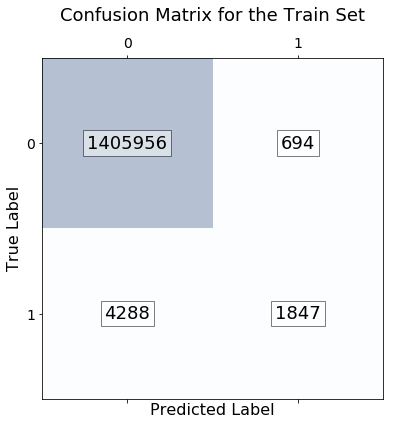

In [57]:
confmat_train = confusion_matrix(ytrain_l, clf_l.predict(Xtrain_l))
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat_train, cmap=plt.cm.Blues, alpha=0.3)
#ax.grid(color='r', linestyle='-', linewidth=2)
for i in range(confmat_train.shape[0]):
    for j in range(confmat_train.shape[1]):
        ax.text(x=j, y=i, s=confmat_train[i, j], va='center', ha='center',fontsize=18,bbox=dict(facecolor='white', alpha=0.5))
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.xlabel('Predicted Label',size=16)
plt.ylabel('True Label',size=16)
plt.title('Confusion Matrix for the Train Set',size=18)
plt.tight_layout()
plt.savefig('Confusion_matrix_train.eps',format = 'eps',dpi = 1300)
plt.show()

In [34]:
#TN_train = cm_train[0][0];TP_train = cm_train[1][1];FP_train = cm_train[0][1]; FN_train = cm_train[1][0]

In [35]:
TPR_train = round(TP_train/(TP_train+FN_train),3) #true positive rate (Recall)

TNR_train = round(TN_train/(TN_train+FP_train),3) #true negative rate (Specifity)

PPV_train = round(TP_train/(TP_train+FP_train),3) #positive predictive value (Precision)

NPV_train = round(TN_train/(TN_train+FN_train),3) # Negative predictive value

FPR_train = round(FP_train/(FP_train+TN_train),3) # Fall out or false positive rate

FNR_train = round(FN_train/(TP_train+FN_train),3) # False negative rate

FDR_train = round(FP_train/(TP_train+FP_train),3) # False discovery rate

ACC_train = round((TP_train+TN_train)/(TP_train+FP_train+FN_train+TN_train),3) # Overall accuracy

In [36]:
print(classification_report_imbalanced(ytrain_l, clf_l.predict(Xtrain_l)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.30      1.00      0.85      0.74   1406650
          1       0.73      0.30      1.00      0.43      0.85      0.71      6135

avg / total       1.00      1.00      0.30      1.00      0.85      0.74   1412785



***PRECISION-RECALL CURVE***

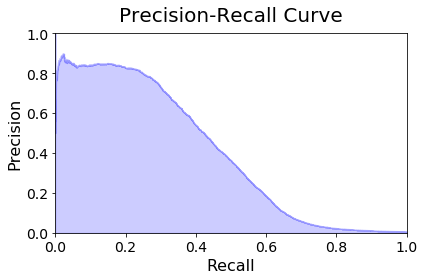

In [70]:
from sklearn.metrics import precision_recall_curve
precision_train, recall_train, _ = precision_recall_curve(ytrain_l, ytrain_score_l)
rcParams['axes.titlepad'] = 12 
plt.step(recall_train, precision_train, color='b', alpha=0.2,where='post')
plt.fill_between(recall_train, precision_train, step='post', alpha=0.2,color='b')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.xlabel('Recall',size=16)
plt.ylabel('Precision',size=16)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve',size=20)
plt.tight_layout()
plt.savefig('Precision_Recall_train.png',format = 'png')

***Receiver Operating Characteristic***

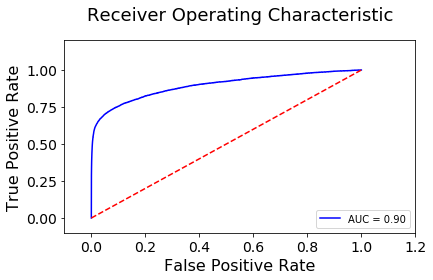

In [73]:
fpr1_train, tpr1_train, _ = roc_curve(ytrain_l, ytrain_score_l)
roc_auc_train = auc(fpr1_train, tpr1_train)
plt.title('Receiver Operating Characteristic',size=18)
plt.plot(fpr1_train, tpr1_train, 'b',label='AUC = %0.2f'% roc_auc_train)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
rcParams['axes.titlepad'] = 20 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate',size=16)
plt.xlabel('False Positive Rate',size=16)
plt.tight_layout()
plt.savefig('ROC_train.eps',format = 'eps',dpi = 1300)
plt.show()

In [38]:
performance_data = np.array([['','PP','NP','SS','ACCURACY','PRECISION','RECALL','TNR'],
                             ['Training Set',PP_train,NP_train,SS_train,ACC_train,PPV_train,TPR_train,TNR_train],
                             ['Test Set',PP_test,NP_test,SS_test,ACC_test,PPV_test,TPR_test,TNR_test]])

In [39]:
performance_table = pd.DataFrame(data=performance_data[1:,1:],
                      index=performance_data[1:,0],
                      columns=performance_data[0,1:])

In [40]:
print(TPR_train,TPR_test)

0.301 0.325


In [41]:

performance_table

,PP,NP,SS,ACCURACY,PRECISION,RECALL,TNR
Training Set,0.004,0.996,1412785,0.996,0.727,0.301,1.0
Test Set,0.004,0.996,156977,0.997,0.756,0.325,1.0


The table above shows that both the training and test datasets are imbalanced with the positive label proportion of 0.004 and 0.005 respectively. The total negative recall (TNR) is 1 due to the high proportion of negative labels in both the training (0.996) and test data (0.995) sets. The precision (0.713 for training set and 0.708 for test set) and accuracy (0.996 for both training and test sets) are good only because the TNR is very good. Accuracy uses count of errors and a simple threshold of 0.5 in classification decisions making it unreliable when evaluating the performance of an machine learning algorithm for an imbalanced data. In our case, the ratio of negative to positive labels is 228:1, implying simply guessing the majority class (natality) gives an accuracy of 99.6%. However, simply guessing the majority class beats the purpose of the classifier as we are more interested in the infant fatality. This is in stark contrast to the low recall values for the training and test sets which are 0.284 and 0.257 respectively. Due to the imbalance in the data (high number of negatives), there is high chance of positive labels being classified as false negatives, reducing the recall score, which is the ratio of true positives to the sum of true positives and false negatives. <br><br> The experiment that shows the effect of proxy features on the apparent performance of classifiers is detailed in the notebook **"Effect_of_data_imbalance_experiment_1"** and **"Effect_of_data_imbalance_experiment_2"**.<br><br> This shows the need for balancing the data, through undersampling or oversampling, or use algorithms that are designed to deal with imbalanced data.